In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights='imagenet', include_top=True)

In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

히든레이어 2개 사용  
1억 3천만개의 파라미터  
클래스가 1000개  


224* 224 * 3 :150528 -> 25088 차원으로 줄임

(224, 224, 3)
float32


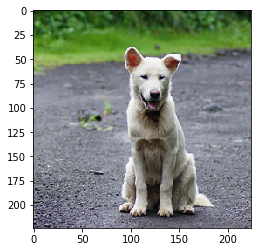

In [9]:
img_path = 'dog.bmp'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) # 0  ~ 255
print(x.shape) 
print(x.dtype)
plt.imshow(x / 255.0) # int일경우 0부터255라고 생각하고 풀어주는데 img_to_arry를 하면 float형태로 나옴

In [10]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [21]:
X = preprocess_input(pred)

In [15]:
plt.show

AttributeError: 'Model' object has no attribute 'predcit'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


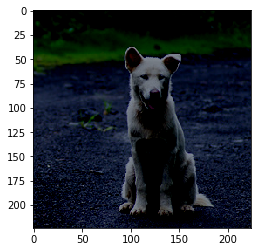

In [14]:
plt.imshow(x[0,:,:,:] /255.0)

In [16]:
pred = model.predict(X)

In [31]:
print(pred.argmax(pred))

TypeError: only integer scalar arrays can be converted to a scalar index

In [28]:
r =decode_predictions(pred, top=3)[0]
print(r[0][1])

Eskimo_dog


In [35]:
import json
json_data =json.load(open('imagenet_class_index.json'))
print(json_data[0])



KeyError: 0

In [36]:
json_data[f"{np.argmax(pred)}"][1]

'Eskimo_dog'

In [41]:
img = cv2.imread("tiger.jpg")
img = cv2.resize(img, (224, 224,))
img = img.reshape(-1, 224, 224, 3)
img = preprocess_input(img)
pred = model.predict(img)
json_data[f"{np.argmax(pred)}"]

['n02129604', 'tiger']

In [42]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=44192d9a233feb1bb33c275a816c444cb8ccb4722ff7111fa3040e2388ad0782
  Stored in directory: c:\users\jinjae\appdata\local\pip\cache\wheels\20\da\eb\a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [44]:
from googletrans import Translator
translator = Translator()
result = translator.translate("tiger", dest="ko")
print(result.text)

호랑이


In [46]:
def toKor(word):
    translator = Translator()
    result = translator.translate(word, dest="ko")
    return result.text

toKor(json_data[f"{np.argmax(pred)}"][1])

'호랑이'

In [48]:
hdic =[]
for d in json_data:
    k = toKor(json_data[d][1])
    hdic.append(k)

KeyboardInterrupt: 

In [49]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 51s 0us/step


In [50]:
img = cv2.imread("tiger.jpg")
img = cv2.resize(img, (224, 224,))
img = img.reshape(-1, 224, 224, 3)
img = preprocess_input(img)
pred = model2.predict(img)
json_data[f"{np.argmax(pred)}"]

['n02129604', 'tiger']

In [51]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [52]:
img = cv2.imread("tiger.jpg")
img = cv2.resize(img, (224, 224,))
img = img.reshape(-1, 224, 224, 3)
img = preprocess_input(img)
pred = model2.predict(img)
r = json_data[f"{np.argmax(pred)}"]
r = toKor(r)
print(r)

AttributeError: 'list' object has no attribute 'text'

In [54]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

model3 = InceptionV3(weights="imagenet")


96116736/96112376 [==============================] - 36s 0us/step


In [55]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [63]:
img = cv2.imread("unnamed.jpg")
img = cv2.resize(img, (299, 299,))
img = img.reshape(-1, 299, 299, 3)
img = preprocess_input(img)
pred = model3.predict(img)
r = toKor(json_data[f"{np.argmax(pred)}"][1])
print(r)

코모도 왕 도마뱀


In [74]:
%%writefile server.py

import flask
from flask import Flask,render_template,url_for,request
import base64
import numpy as np
import cv2
from keras.models import load_model 
import io 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import json
import tensorflow as tf
from keras import backend as K
import pickle


init_Base64 = 22   # data:image/png;base64, 로 시작하
app = Flask(__name__)

global model 
global sess
global graph

sess = tf.Session()       
graph = tf.get_default_graph() 
K.set_session(sess)

model = ResNet50(weights='imagenet')
with open("hdict.bin","rb") as fr:
    hdict = pickle.load(fr)

@app.route('/')
def home():
    return "ok~~~"


@app.route('/image', methods=['POST'])
def upload():       
    draw = request.form['photo_cap']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype="uint8")
    
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)    
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)                
    image = image.reshape(-1, 224, 224, 3)
    image = preprocess_input(image)
    
    with graph.as_default():
        K.set_session(sess)
        pred = model.predict(image)
        r = hdict[np.argmax(pred)]
        
    return f"인식결과:{r}"
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)
    

Overwriting server.py


In [ ]:
import pickle
# with open("hdict.bin", "wb") as fw:
#     pickle.dump(hdict, fw)
    
with open("hdict.bin", "rb") as fr:
    hdict2 = pickle.load(fr)
print(hdict2)

# Data Augmentation
---

In [75]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [77]:
data_aug_gen = ImageDataGenerator(rescale=1./255)

train_generator = data_aug_gen.flow_from_directory(
    'dataset/hard_handwriting_shape/train', # 경로
    target_size=(24, 24),  # 크기를 맞춰준다.
    batch_size=3,  # 데이터를 가지고 올때마다 3개씩 준다.
    class_mode='categorical') # 카테고리칼 하면 원 핫 인코딩이 되어 넘어오고 바이너리일 경우 0,1,2,3~ 레이블되어 준다.

Found 45 images belonging to 3 classes.


폴더 구조를 인식하여 45개의 이미지를 인식하고 3개의 클래스가 있다고 함

## CNN 네트워크 구축

In [161]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(24, 24, 3)))
model.add(Conv2D(64, kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [81]:
model.fit_generator(
    train_generator, # 내부적으로 배치크기만큼 가지고옴 확장하기 매우 수월하다.
    steps_per_epoch=15, # 전체데이터를 15개만큼 나누어 학습해라.
    epochs=5
)

Epoch 1/5
15/15 [==============================] - 1s 77ms/step - loss: 0.7723 - accuracy: 0.7111
Epoch 2/5
15/15 [==============================] - 0s 30ms/step - loss: 0.1434 - accuracy: 0.9556
Epoch 3/5
15/15 [==============================] - 0s 29ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 1s 34ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/5
15/15 [==============================] - 1s 36ms/step - loss: 8.0319e-04 - accuracy: 1.0000


학습은 `fit_generator`

In [83]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset/hard_handwriting_shape/test_easy',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical', shuffle=False
)
# training 데이터는 섞어서 사용하고 test는 구지 안섞어도됨

Found 15 images belonging to 3 classes.


In [85]:
scores = model.evaluate_generator(test_generator, steps=5)
print(scores[1])

1.0


In [86]:
test_datagen = ImageDataGenerator(rescale=1./255) # 0~1로 normalization

test_generator = test_datagen.flow_from_directory(
    'dataset/hard_handwriting_shape/test',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical', shuffle=False
)
# training 데이터는 섞어서 사용하고 test는 구지 안섞어도됨

Found 15 images belonging to 3 classes.


In [87]:
scores = model.evaluate_generator(test_generator, steps=5)
print(scores[1])

0.3333333432674408


test 는 training과 비슷하지 않고 변화가 많아 성능이 떨어짐  
test_easy는 training과 크게 다르지 않은 데이터가 있음  




In [90]:
img = cv2.imread('cat.jpg')
img = np.expand_dims(img, 0)


In [91]:
generator = ImageDataGenerator(width_shift_range = 0.2 ) # +- 20% 을 좌우로 sift 하여 이미지 증폭

obj = generator.flow(img, batch_size=1) # 위에서 성의한 이미지 제너레이터를 적용한 이미지를 넣어 flow batch_size를 주면?/


obj는 아직 이미지가 아니다.  


In [92]:
image = next(obj) # 데이터를 이제 가져와주세요라는 의미

(1, 414, 500, 3)


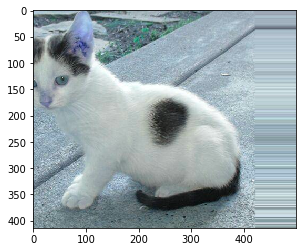

In [96]:
print(image.shape) # 4차원의 이미지 # CNN 다룰 때는 무조건 4차원
plt.imshow(image[0]/255) # float 타입이기때문에 255로 나누어줘야지만 정상적으로 나옴


고양이를 shift 한 것을 볼수 있다. (이것은 왼쪽으로 이동)   
오른쪽 공간은 마지막 픽셀을 늘려줌 

(1, 414, 500, 3)


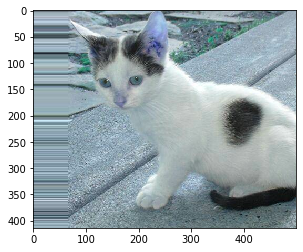

In [98]:
image = next(obj) # 데이터를 이제 가져와주세요라는 의미
print(image.shape) # 4차원의 이미지 # CNN 다룰 때는 무조건 4차원
plt.imshow(image[0]/255) # float 타입이기때문에 255로 나누어줘야지만 정상적으로 나옴


`next`는 무한대로 호출할 수 있다.  

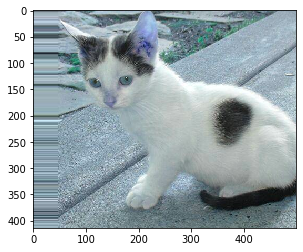

In [100]:
generator = ImageDataGenerator(rescale=1./255,   # rescale을 추가
                               width_shift_range = 0.2 ) # +- 20% 을 좌우로 sift 하여 이미지 증폭

obj = generator.flow(img, batch_size=1) # 위에서 성의한 이미지 제너레이터를 적용한 이미지를 넣어 flow batch_size를 주면?/
image = next(obj)
plt.imshow(image[0]) # 255로 안나눠도 됨!

    기하학적 옵션을 다룰 수 있는 것들이 아주 많다.

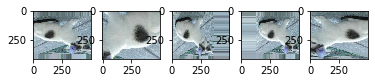

In [107]:
generator = ImageDataGenerator(rescale=1./255,   # rescale을 추가
                               width_shift_range = 0.2, # +- 20% 을 좌우로 sift 하여 이미지 증폭
                               horizontal_flip= True, # 좌우를 뒤집겠다. 
                               vertical_flip = True, # 수직으로 뒤집겠다. 
                               zoom_range=[0.5, 1.5] # 최소- 최대 범위 영상을 줌 하겠다. 
                              ) # 영상을 확대한다고 해서 영상 크기가 커지는 것이 아님.

obj = generator.flow(img, batch_size=1) # 위에서 성의한 이미지 제너레이터를 적용한 이미지를 넣어 flow batch_size를 주면?/

for i in range(5):
    image = next(obj)
    plt.subplot(1, 5, i+1)
    plt.imshow(image[0])

리스케일은 무조건 적용되고  
나머지는 거의 랜덤하게 적용  

냐-옹

In [109]:
data_aug_gen = ImageDataGenerator(rescale=1./255,   # rescale을 추가
                                  rotation_range=15, # + - 15도
                               width_shift_range = 0.2, # +- 20% 을 좌우로 sift 하여 이미지 증폭
                               horizontal_flip= True, # 좌우를 뒤집겠다. 
                               vertical_flip = True, # 수직으로 뒤집겠다. 
                                  shear_range=0.5 , # 평행사변형처럼 잡아 땡기는 것
                               zoom_range=[0.5, 1.5], # 최소- 최대 범위 영상을 줌 하겠다. 
                              fill_mode='nearest' # 빈공간 가장 가까운 값으로 채우기
                                 ) # 영상을 확대한다고 해서 영상 크기가 커지는 것이 아님.


obj = data_aug_gen.flow(img, batch_size=1) # 위에서 성의한 이미지 제너레이터를 적용한 이미지를 넣어 flow batch_size를 주면?/
# 트레이닝 데이터가 100개일 때 batch_size를 10을 주면 10개씩 뽑느다.

응용분야마다 매우 다를 수 있다,  
예를 들어 도형에서는 플립을 하는게 좋고  
다른 어떤 분야에서는 플립을 하면 더 노이즈를 만드는 상황일 수도있다. 

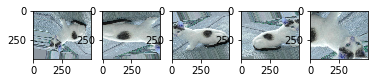

In [110]:
for i in range(5):
    image = next(obj)
    plt.subplot(1, 5, i+1)
    plt.imshow(image[0])

In [136]:
obj = data_aug_gen.flow_from_directory('dataset/hard_handwriting_shape/train',
                                      target_size=(24, 24),
                                      batch_size=5,
                                      class_mode='categorical')

Found 45 images belonging to 3 classes.


In [151]:
result = next(obj)
len(image[0])
img = np.array(result[0])
label = result[1]
print(img.shape)
print(label)

(5, 24, 24, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


레이블까지 같이 리턴해준다.  

In [162]:
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=45,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest') 
train_generator = data_aug_gen.flow_from_directory(
        'dataset/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=5,
        class_mode='categorical'
)

model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs= 30)

Found 45 images belonging to 3 classes.
Epoch 1/30
15/15 [==============================] - 1s 71ms/step - loss: 1.2892 - accuracy: 0.3333
Epoch 2/30
15/15 [==============================] - 1s 37ms/step - loss: 1.0860 - accuracy: 0.3600
Epoch 3/30
15/15 [==============================] - 0s 31ms/step - loss: 1.0088 - accuracy: 0.4533
Epoch 4/30
15/15 [==============================] - 1s 36ms/step - loss: 0.8444 - accuracy: 0.5067
Epoch 5/30
15/15 [==============================] - 1s 38ms/step - loss: 0.8424 - accuracy: 0.5467
Epoch 6/30
15/15 [==============================] - 0s 32ms/step - loss: 0.7150 - accuracy: 0.6267
Epoch 7/30
15/15 [==============================] - 1s 38ms/step - loss: 0.7372 - accuracy: 0.6933
Epoch 8/30
15/15 [==============================] - 1s 40ms/step - loss: 0.7306 - accuracy: 0.5733
Epoch 9/30
15/15 [==============================] - 0s 31ms/step - loss: 0.7019 - accuracy: 0.7200
Epoch 10/30
15/15 [==============================] - 1s 34ms/step - l

0.5333333611488342


In [160]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'dataset/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

Found 15 images belonging to 3 classes.
0.6000000238418579


내 응용분야에 맞추어 바꿀 수는 없을까


1. 전처리과정

# 사용자 정의 함수
---

In [167]:
def myFunc(image):
    converted_img = image / 255
    return converted_img

test_datagen = ImageDataGenerator(rescale = None,
                                 preprocessing_function=myFunc)
test_generator = test_datagen.flow_from_directory('dataset/hard_handwriting_shape/test',
                                                 target_size=(5,5), color_mode='grayscale')

Found 15 images belonging to 3 classes.


`preprocessing_function` 사용자 정의 함수를 실행한다.  


In [169]:
img = next(test_generator)


모폴로지 연산을 쓰고 싶다면?  
이것은 rescale과 다르게 플립과 같은 것과 같이 적용이 되거나 안되거나 해야한다.  

어떻게 해야할까.  

ImageDataGenerator를 상속받아 추가하면 된다.  

In [186]:
# *kwargs 가 무엇인가
class MyClass0 :
    def __init__(self, v):
        print("hello", v)

class MyClass :
    def __init__(self, *args,  **kwargs):
        print(kwargs)
        print(args)

class MyClass2 :
    def __init__(self, v):
        self.v = v # 지역변수
        
A = MyClass0(80.9)
# B = MyClass()
C = MyClass(30, 40, r=10, b=20, g=30) # 내부적으로 딕셔너리로 변경해줌 -> {'r': 10, 'b': 20, 'g': 30}
D = MyClass(45, 20)
E = MyClass2(20)
print(E.v)

hello 80.9
{'r': 10, 'b': 20, 'g': 30}
(30, 40)
{}
(45, 20)
20


**kwargs: name 값이 있는 변수값ㅇ르 받을 때 사용 미리 명시하지 않아도됨  

*args: name값이 없는 변수값을 받을 때 사용  (  )

D = MyClass(45, 20, r=10, b=20, g=30)  

=> 파라미터는 3개임 (45, 20) {'r': 10, 'b': 20, 'g': 30} self  



# 더 좋은 사용자 정의 함수 만들기

In [211]:
import random

class CustomDataGenerator(ImageDataGenerator):
    def __init__(self,red_range=None, green_range=None, blue_range=None, **kwargs):  
        super().__init__(preprocessing_function=self.augment_color, **kwargs)

        self.red_range = red_range
        self.green_range = green_range
        self.blue_range = blue_range

    def augment_color(self, image):
        if random.randint(0, 3) == 0:
            image[:,:,0] = 0
            image[:,:,2] = 0
        return image


매번 함수가 적용되지만 다른 파라미터를 쓸수 있는 장점있음.  
함수 내부에서 랜덤하게 적용하게 만들 수도 있다.  

이렇게 쓰면 왠만한 변경은 다 가능할듯하다.


In [212]:
datagen = CustomDataGenerator(red_range=(0.8, 1.2),
                             green_range=(0.8, 1.2),
                             blue_range=(0.8, 1.2),
                              brightness_range=(0.5, 1.5),
                              horizontal_flip= True)

img = cv2.imread('cat.jpg')
img = np.expand_dims(img, 0)
test_generator = datagen.flow(img)

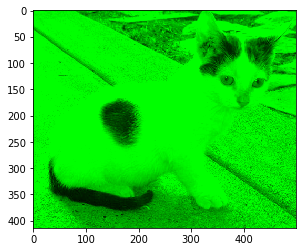

In [247]:
result = next(test_generator)
plt.imshow(result[0]/255)

# 한글 OCR

In [248]:
import io 

csv_file_path = "dataset/korean/label_image_map.csv"
lable_file = "dataset/korean/label.txt"

csv_file = io.open(csv_file_path, 'r', encoding='utf-8')
labels_file = io.open(lable_file, 'r', encoding='utf-8').read().splitlines()

# Map characters to indices.
label_dict = {}
count = 0
for label in labels_file:
    label_dict[label] = count
    count += 1

# Build the lists.
filenames = []
labels = []

for row in csv_file:
    path, label = row.strip().split(',')
    filenames.append('./dataset/korean/' + path)
    labels.append(label_dict[label])

print("csv file load finished")


csv file load finished


In [ ]:
#print(labels)
print(labels_file)

In [249]:
from subprocess import check_output
import random

seed = 1998

shuffled_indices = list(range(len(filenames)))
random.seed(seed)
random.shuffle(shuffled_indices)
filenames = [ filenames[i] for i in shuffled_indices]
labels = [labels[i] for i in shuffled_indices]

print("List shuffle finished")

List shuffle finished


131
6
591
891
750


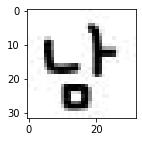

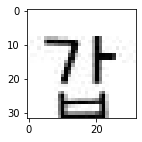

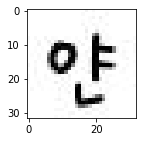

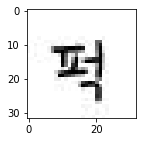

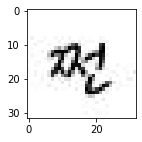

In [250]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0, 5):
    print(labels[i])
    
    img = mpimg.imread(filenames[i])
    
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap ='gray')

In [251]:
import cv2

X_data = []

total_count = 0
prev_count = 0
  
for image_path in filenames:
    image = cv2.imread(image_path)
    X_data.append(image)
    total_count += 1
    
    if total_count - prev_count > 5000:
      prev_count = total_count
      print('{} images added...'.format(total_count))
    
print("Image adding finished")

5001 images added...
10002 images added...
15003 images added...
20004 images added...
25005 images added...
30006 images added...
35007 images added...
40008 images added...
45009 images added...
Image adding finished


In [252]:
import numpy as np
from sklearn.model_selection import train_test_split

r = 0.20
X = np.array(X_data)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = r)

print("X_data:", X.shape)
print("y_labels:", y.shape)
print("\nX_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

X_data: (46060, 32, 32, 3)
y_labels: (46060,)

X_train: (36848, 32, 32, 3)
X_val: (9212, 32, 32, 3)
y_train: (36848,)
y_val: (9212,)


In [253]:
import keras.utils as utils


batch_size = 128
epochs = 3#300
num_classes = 980

y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

train_generator = ImageDataGenerator(rescale=1./255, 
                                     rotation_range=15, 
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15, 
                                     shear_range=0.2, 
                                     zoom_range=[0.8, 1.2])

val_generator = ImageDataGenerator(rescale=1./255)

train_data_flow = train_generator.flow(X_train, y_train, 
                                       batch_size=batch_size)
val_data_flow = val_generator.flow(X_val, y_val,
                                   batch_size=batch_size)

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

In [255]:
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten
import keras

model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

RMSprop = keras.optimizers.RMSprop(lr=0.001)
                     
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])

In [ ]:
hist = model.fit_generator(train_data_flow,
                           epochs=8,
                           verbose=1,
                           steps_per_epoch = 230,
                           validation_data=val_data_flow,
                           validation_steps = 70)

Epoch 1/8
229/230 [============================>.] - ETA: 0s - loss: 6.8741 - accuracy: 8.1922e-04